# Support Vector Machine or SVM:

 - __Classification Technique:__


  - Its a model that best splits the data at hand

   - Used to find the widest margin that splits the data

   - Making sure the distance between the __support vectors__ and the __hyperplane__ are as far as possible
   - Doing so _maximizes_ the margin


 - This is a __constrained optimization problem__
  - __Optimization__ beacuse we are trying to maximize the margain
  - __Constrained__ because the constraint is that our support vectors cannot be on the hyperplane
  - We can do this by using __Lagrange Multipliers__
  
  
# StatQuest Information (SVM)

<img src="maxmargin.png" style="width:700px;height:100px"/>

Here is a __Maximal Margin Classifiers__, they are _super sensitives to outliers_ in the training data, so this makes them pretty bad.


To fix this problem, we must allow misclassifications. 

<img src="lowvariance.png" style="width:700px;height:100px"/>

Doing so will result in a higher bias, but a much lower variance as it responds much better to new data.
  
When we allow these misclassifications, the margin is called a __soft margin__

In order to find the best __soft margin__, we use cross validation to determine how many misclassifications and observations to allow inside of the Soft Margin to get the best classification.

When we use a Soft Margin to determing the location of a threshold, then we are using a Soft Margin Classifier AKA a Support Vector Classifier to classify observations

<img src="pic6.png" style="width:700px;height:300px"/>

For 2 features like weight and height, the SVC is a line, for 3 features like weight, height and age, the SVC is a plane. 

Now there are some situations that you would __not__ want to use a Support Vector Classifier:

<img src="pic7.png" style="width:700px;height:50px"/>

The red dots are not-cured patients and the green dots are cured patients.

Here, the drug dosage only works when its _just right_, not too much, not too little.
Using an SVC here would draw our threshold right down the middle, resulting in many misclassifications, which would be bad.

Can we do better than SVC? YES! This would be __Support Vector Machines__. 

What we do is create another graph with an x & y axis. The y-axis would represent the square of each "dosage" value on the one-dimensional number line. Doing this gives us the same data but in two-dimensions, allowing us to use a Support Vector Classifier line. 

<img src="BAM.png" style="width:500px;height:250px"/>


Now why not cube the data points? SVM's use something called __Kernel Function__.

You can use a polynomial Kernal, which has a parameter, d, which stands for the degree of the polynomial.
When d = 1, the Kernel computes the relationships between each pair of observations in 1-Dimension.

We can use __Cross Validation__ to find a good value for d.

Another commonly used Kernel is the Radial Kernel. It finds SVM's in infinite dimension.

When used in a 1-dimensional setting though, it acts like a __weighted nearest neighbor__ model. 

<img src="pic8.png" style="width:700px;height:100px"/>

In that image, the closest observations (nearest neighbours) around the new (black) observation have a lot of influence on how we will classify the new observation. The further observations have little influence on the classification. The __radial kernal__ will classify that new observation as red.






 - A real world example:
  - How might one differentiate from a __cupcake__ and a __muffin__?
  - Does a cupcake exclusivly have frosting on it compared to a muffin where they usually have raisins or blueberries inside?
  - Our challenge is to __classify__ based on __recipes__ weather something is a cupcake or a muffin
  - We feed the classifier a recipe, and we get back weather its a cupcake or a muffin recipe.
  

 - __Steps to doing this:__
  - 1. Find the data
  - 2. Apply a machine learning model, which will be SVM
  - 3. Review the results
 

In [33]:
#Code directly referenced from Alice Zhao's video, the video link is: https://www.youtube.com/watch?v=N1vOgolbjSc

#Allows charts and graphs to appear in jupyter notebook
%matplotlib inline 

#Libraries for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

#Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

__Step 2:__ Import the data

In [34]:
#All data values are percentages
recipes = pd.read_csv("recipes_muffins_cupcakes.csv")
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


 __Step 3:__ Prepare the data

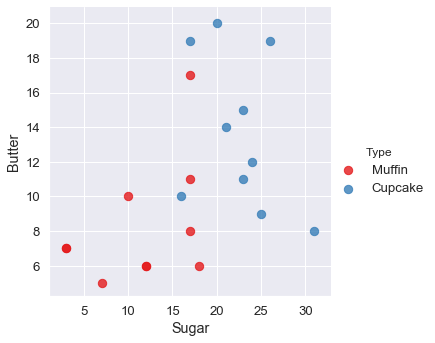

In [35]:
#Plotting two important ingrediants
sns.lmplot('Sugar', 'Butter', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [36]:
sugar_butter = recipes[['Sugar','Butter']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'